In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("ciit-survey.csv")
df.head()

,Name,School,User Email,YearLevel,Age,Platform,Course,Sex,Music_Top_#1,Music_Top_#2,...,Artist_#2,Artist_#3,Artist_#4,Artist_#5,Music_Genres_1,Music_Genres_2,Music_Genres_3,Music_Genres_4,Music_Genres_5,Permission
0,Rod Sevilla,St. John of Beverley,rod.jasper.sevilla@sjb.edu.ph,3rd Year,22,Spotify,BFA,male,The Great War - Taylor Swift,7 PM - BSS,...,Taylor Swift,Ailee,IU,Day6,Country,Pop,R&B/Soul,Classical,Rock,checked
1,Kyla Francisco,Trinity University of Asia,kylapaulinedfrancisco@tua.edu.ph,2nd Year,22,Spotify,BFA,female,Silver Lining- Grent Perez,You're On Your Own Kid- Taylor Swift,...,Taylor Swift,Kali Uchis,NIKI,The Weekend,Pop,R&B/Soul,Jazz,Electronic/Dance,Rock,checked
2,Mary Andrei Sambas,University of the Philippines,mcsambas@up.edu.ph,2nd Year,21,Spotify,BFA,female,Nothing - Bruno Major,Valentine - Laufey,...,Bruno Major,John Mayer,Aaliyah,Honne,Jazz,R&B/Soul,Pop,Classical,Blues,checked
3,Mary Grace S. De Leon,De La Salle University,DMS0579@dlsud.edu.ph,3rd Year,22,Spotify,BFA,female,Mine (Taylor's version) - Taylor Swift,Absence of you - Great Perez,...,Grent Perez,MRLD,The Ridleys,Lola Amour,R&B/Soul,Classical,Pop,Country,Hip-Hop/Rap,checked
4,Louise Ojera,University of San Carlos,20100056@usc.edu.ph,2nd Year,23,Spotify,BFA,male,F*ck My Life - Seventeen,Tally - BlackPink,...,SEVENTEEN,GOT7,BlackPink,Nicki Minaj,Pop,R&B/Soul,Electronic/Dance,Hip-Hop/Rap,Jazz,checked


In [3]:
genre_mapping = {
    'Country': 1
    ,'Pop': 2
    ,'R&B/Soul': 3
    ,'Classical': 4
    ,'Rock': 5
    ,'Jazz': 6
    ,'Electronic/Dance': 7
    ,'Blues': 8
    ,'Hip-Hop/Rap': 9
    ,'Metal': 10
    ,'Punk': 11
    
}

In [4]:
for index, row in df.iterrows():
    for i in range(1, 6):  # Assuming the music genres are in columns 'Music_Genres_1' to 'Music_Genres_5'
        genre = row[f'Music_Genres_{i}']
        if genre in genre_mapping:
            df.at[index, f'Music_Genres_{i}'] = genre_mapping[genre]
            
df

,Name,School,User Email,YearLevel,Age,Platform,Course,Sex,Music_Top_#1,Music_Top_#2,...,Artist_#2,Artist_#3,Artist_#4,Artist_#5,Music_Genres_1,Music_Genres_2,Music_Genres_3,Music_Genres_4,Music_Genres_5,Permission
0,Rod Sevilla,St. John of Beverley,rod.jasper.sevilla@sjb.edu.ph,3rd Year,22,Spotify,BFA,male,The Great War - Taylor Swift,7 PM - BSS,...,Taylor Swift,Ailee,IU,Day6,1,2,3,4,5,checked
1,Kyla Francisco,Trinity University of Asia,kylapaulinedfrancisco@tua.edu.ph,2nd Year,22,Spotify,BFA,female,Silver Lining- Grent Perez,You're On Your Own Kid- Taylor Swift,...,Taylor Swift,Kali Uchis,NIKI,The Weekend,2,3,6,7,5,checked
2,Mary Andrei Sambas,University of the Philippines,mcsambas@up.edu.ph,2nd Year,21,Spotify,BFA,female,Nothing - Bruno Major,Valentine - Laufey,...,Bruno Major,John Mayer,Aaliyah,Honne,6,3,2,4,8,checked
3,Mary Grace S. De Leon,De La Salle University,DMS0579@dlsud.edu.ph,3rd Year,22,Spotify,BFA,female,Mine (Taylor's version) - Taylor Swift,Absence of you - Great Perez,...,Grent Perez,MRLD,The Ridleys,Lola Amour,3,4,2,1,9,checked
4,Louise Ojera,University of San Carlos,20100056@usc.edu.ph,2nd Year,23,Spotify,BFA,male,F*ck My Life - Seventeen,Tally - BlackPink,...,SEVENTEEN,GOT7,BlackPink,Nicki Minaj,2,3,7,9,6,checked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Patrick Martin Ramos,CIIT College of Arts and Technology,Patrick.ramos@ciit.edu.ph,1st Year,25,Spotify,BSEMC,male,Fakeit - Sawano hiroyoki,I really want to stay at your house - rosa walton,...,One ok rock,Eve,Yaosobi,Linking park,2,5,6,9,10,checked
211,Myda Geia G. Santos,CIIT College of Arts and Technology,myda.santos@ciit.edu.ph,1st Year,20,Spotify,BSEMC,female,End of Small Sanctuary - Akira Yamioka,Perfect Girl - Mareux,...,Radiohead,Death Grips,Deftones,Zild,5,10,7,9,2,checked
212,Manuel Angelo Abanilla,CIIT College of Arts and Technology,manuel.abanilla@ciit.edu.ph,1st Year,20,Spotify,BSEMC,male,"DENONBU, Moe Shop - Eat Sleep Dance","DENONBU, Shinpei Nasuno - pop enemy",...,Lil Uzi Vert,Kanye West,Gesaffelstein,Yakui The Maid,9,7,3,10,5,checked
213,Jhan Khendrick Perez,CIIT College of Arts and Technology,jhan.perez@ciit.edu.ph,2nd Year,23,Spotify,EMC,male,Pinocchio P,Dark Piano,...,Kobatyu,Rameses B,Jolene Richard Hughes,Yuki Kajiura,7,4,3,1,2,checked


In [5]:
course_mapping = {
    'BFA': 1,
    'BMMA': 2,
    'BS ARCH': 3,
    'BSBA': 4,
    'BSCE': 5,
    'BSCPE': 6,
    'BSCS': 7,
    'BSEMC': 8,
    'EMC': 9,
    'MA PSYCH': 10
}
df['Course'] = df['Course'].map(lambda x: course_mapping.get(x, 11))
df.head()

,Name,School,User Email,YearLevel,Age,Platform,Course,Sex,Music_Top_#1,Music_Top_#2,...,Artist_#2,Artist_#3,Artist_#4,Artist_#5,Music_Genres_1,Music_Genres_2,Music_Genres_3,Music_Genres_4,Music_Genres_5,Permission
0,Rod Sevilla,St. John of Beverley,rod.jasper.sevilla@sjb.edu.ph,3rd Year,22,Spotify,1,male,The Great War - Taylor Swift,7 PM - BSS,...,Taylor Swift,Ailee,IU,Day6,1,2,3,4,5,checked
1,Kyla Francisco,Trinity University of Asia,kylapaulinedfrancisco@tua.edu.ph,2nd Year,22,Spotify,1,female,Silver Lining- Grent Perez,You're On Your Own Kid- Taylor Swift,...,Taylor Swift,Kali Uchis,NIKI,The Weekend,2,3,6,7,5,checked
2,Mary Andrei Sambas,University of the Philippines,mcsambas@up.edu.ph,2nd Year,21,Spotify,1,female,Nothing - Bruno Major,Valentine - Laufey,...,Bruno Major,John Mayer,Aaliyah,Honne,6,3,2,4,8,checked
3,Mary Grace S. De Leon,De La Salle University,DMS0579@dlsud.edu.ph,3rd Year,22,Spotify,1,female,Mine (Taylor's version) - Taylor Swift,Absence of you - Great Perez,...,Grent Perez,MRLD,The Ridleys,Lola Amour,3,4,2,1,9,checked
4,Louise Ojera,University of San Carlos,20100056@usc.edu.ph,2nd Year,23,Spotify,1,male,F*ck My Life - Seventeen,Tally - BlackPink,...,SEVENTEEN,GOT7,BlackPink,Nicki Minaj,2,3,7,9,6,checked


Accuracy: 30.23255813953488 %


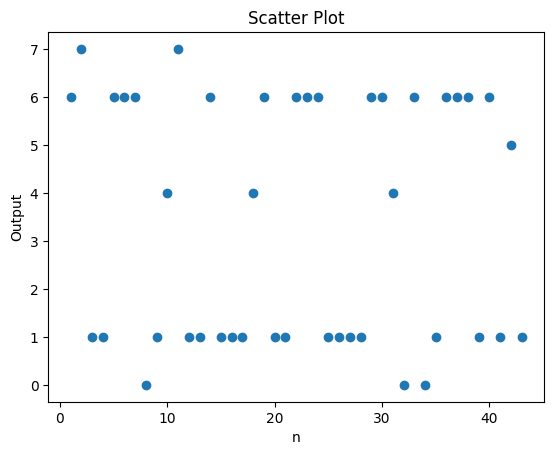

In [6]:
X1 = df[['Music_Genres_1', 'Music_Genres_2', 'Music_Genres_3', 'Music_Genres_4', 'Music_Genres_5']]
y = df['Course']

# Convert all values to strings in the input features
X1 = X1.astype(str)

# Encode the input features using LabelEncoder
label_encoder = LabelEncoder()
X1_encoded = X1.apply(label_encoder.fit_transform)

# Encode the target variable 'Course' using LabelEncoder
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X1_train, X1_test, y_train, y_test = train_test_split(X1_encoded, y_encoded, test_size=0.2, random_state=1)

# Create and fit the KNeighborsClassifier model
knn = KNeighborsClassifier()
knn.fit(X1_train, y_train)

# Predict the output for X1_test
output = knn.predict(X1_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, output)
print("Accuracy:", accuracy * 100, "%")

# Plot the output
n = len(output)
n_range = range(1, n+1)
plt.scatter(n_range, output)
plt.xlabel('n')
plt.ylabel('Output')
plt.title('Scatter Plot')
plt.show()

In [7]:
y

0       1
1       1
2       1
3       1
4       1
       ..
210     8
211     8
212     8
213     9
214    10
Name: Course, Length: 215, dtype: int64

In [ ]:
import numpy as np

# Get user input for the index of the course
index_of_course = int(input("Enter the index of the course (0 to 9): "))

# Check if the entered index is valid
if index_of_course < 0 or index_of_course > 9:
    print("Invalid index. Please enter an index between 0 and 9.")
else:
    # Get the encoded course at the specified index
    course_encoded = X1_encoded.iloc[[index_of_course]]

    # Predict the output probabilities for the given course
    output_proba = knn.predict_proba(course_encoded)

    # Convert probabilities to percentages
    output_percentage = output_proba[0] * 100

    # Get the classes (genre names) corresponding to the probability values
    genre_names_encoded = np.arange(len(output_percentage))
    genre_names = [key for key, value in genre_mapping.items() if value in genre_names_encoded]

    # Get the course title for the given index
    course_title = [key for key, value in course_mapping.items() if value == index_of_course + 1][0]

    # Print the course title
    print(f"Course Title: {course_title}\n")

    # Print the likelihood of each genre as a percentage for the given course
    for genre, prob in zip(genre_names, output_percentage):
        print(f"Genre: {genre}, Likelihood: {prob:.2f}%")


https://drive.google.com/file/d/1CU7kVzcJgfBkYFo1S6VsrHFKhf4hQfZw/view?usp=sharing

Analyzing Music Genres for Predicting Listener Preferences: A Machine Learning Approach


A Case Study
Presented to the Faculty of the
CIIT College of Arts and Technology

In partial fulfillment of the requirements for the
Bachelor of Science in Computer Science


By
Ardaniel, Allen Aouie G.
Bombuhay, John David
Estacio, John Kobe B.
Operio, Elvic James F.


July 2023

Introduction
In today's music world, understanding what kinds of music people like and predicting their future music choices is really important. With so many different music styles out there, using machine learning can help us figure out how these music genres are connected to people's preferences. This study explores the exciting field of music genre analysis using advanced machine learning techniques to find patterns and characteristics that can help us guess what kind of music people will enjoy next. By doing this research, we hope to improve personalized music suggestions, marketing strategies, and make music discovery more enjoyable for everyone.

1.1 Background of the Study
In the realm of music, various genres cater to diverse individual preferences. To comprehend the intricacies of these musical choices and predict how they may change over time, researchers have turned to the potent capabilities of machine learning. By utilizing this technology, they can examine the connections between different music genres and people's likings more comprehensively. Understanding the factors that make specific genres appealing to certain listeners and how these preferences evolve can lead to improved personalized music recommendations, better audience targeting for musicians and music platforms, and an enhanced music discovery experience for music enthusiasts worldwide. In essence, this study seeks to unlock exciting advancements in the music domain, transforming the way we engage with and enjoy music in our daily lives.
1.2 Objectives of the Study

1.2.1 General Objectives
The main goal of this study is to use machine learning techniques to explore and analyze music genres, understand their impact on listener preferences, and forecast how their musical choices may evolve over time.

1.2.2 Specific Objective
Identify and classify different music genres based on their unique characteristics and elements. 
Analyze a large dataset of listeners' music preferences and behaviors to discover patterns and connections between specific genres and individual tastes. 
Develop and apply machine learning models capable of predicting listeners' future music preferences based on their current genre preferences. 
Assess the accuracy and effectiveness of the machine learning models in predicting listeners' musical trajectory. 
Provide valuable insights and recommendations to improve personalized music suggestions, marketing strategies, and overall music discovery experiences for music platforms and industry stakeholders.

1.3 Scope and Limitations of the Study
The scope of this study encompasses a comprehensive analysis of music genres and their influence on listeners' preferences using machine learning techniques. It involves the exploration and categorization of various music genres based on their distinctive characteristics and elements. The research will utilize a substantial dataset of listeners' music preferences and behaviors to identify patterns and correlations between specific genres and individual tastes. The study will also focus on developing and implementing machine learning models to predict listeners' future music preferences, enabling insights into potential musical trajectories.

Limitations of the Study
Data Availability: The accuracy and effectiveness of the machine learning models heavily rely on the availability and quality of the dataset. Limitations in data collection or incomplete data may impact the overall analysis and predictions.

Genre Complexity: Music genres can be multifaceted and may not always fit neatly into predefined categories. Some genres may have overlapping characteristics, making it challenging to create distinct boundaries for analysis.

Data Bias: The dataset utilized for training the machine learning models may possess inherent biases since it mainly comprises information from CIIT students. This could result in potential inaccuracies or unfair predictions, impacting the overall validity of the predictions made by the models.

Evolving Listener Preferences: Listener preferences are dynamic and can change over time due to various factors such as trends, personal experiences, and cultural shifts. Predicting long-term musical trajectories accurately is a challenging task.

Interpretation of Results: While machine learning can uncover patterns, the interpretation of the results may require human judgment and expertise. Different interpretations could lead to diverse insights.

Generalization: The study's findings and predictions may not be universally applicable across all demographics and cultural backgrounds, as musical preferences can vary significantly among different groups of people.

1.4 Significance of the Study
The study's importance lies in the valuable insights and progress it can bring to music analysis and recommendation systems. By utilizing machine learning techniques to explore music genres and their impact on listener preferences, this research can have several significant implications:

Enhanced Personalized Music Recommendations: By uncovering connections between music genres and individual tastes, the study can lead to more precise and customized music recommendations, improving user satisfaction on music platforms.
Enriched Music Discovery: Predicting listeners' future music preferences can create a more enjoyable and effortless music discovery experience, introducing users to a diverse range of music that aligns with their evolving interests.
Informed Marketing and Promotion: Musicians, music platforms, and record labels can utilize the study's findings to better target their audience and promote music based on specific genre preferences.
Data-Driven Decision Making: The research's data-driven recommendations can aid artists and industry stakeholders in making strategic decisions for their creative and business ventures.
Understanding Music Consumption Patterns: Through analyzing listener behaviors and genre preferences, the study can reveal broader trends and patterns in music consumption, contributing to a deeper understanding of the music industry dynamics.
Addressing Bias and Fairness: Identifying potential biases in the dataset and machine learning models can foster discussions on fairness and ethical considerations in music recommendation systems.
Academic Contribution: The study can serve as a foundation for future research in machine learning, music analysis, and recommendation systems, encouraging further exploration in music preferences and consumption behavior.

Methodology
2.1 Target Population
The target population for this study comprises 150 students from CIIT College of Arts and Technology and 50 students from other institutions. In total, there are 200 students in the target population.

2.2 Sample Size and Sampling Method
Random sampling is the chosen sampling method for this study, encompassing a target population of 200 students, consisting of 150 individuals from CIIT and 50 from other institutions. In this approach, every student within the target population has an equal chance of being selected for the sample. This ensures the sample's representativeness and impartiality, allowing for unbiased conclusions and broader generalizability of the study's findings. Random sampling is the preferred method to avoid potential biases and obtain a fair representation of both CIIT and other student groups, facilitating a comprehensive analysis of their characteristics, preferences, and experiences.

2.3 Data Collection Method
The researchers collaborated with another research group that shared the same theme of the topic to create a survey platform hosted on Vercel, which improved the efficiency of their data collection process. Through the development of a customized survey tool, they were able to tailor questions and features to align with their specific research objectives. Additionally, this research project joined forces with other studies, working together to accelerate data gathering while maintaining a strong focus on ensuring data privacy and security.

To safeguard data privacy, the students implemented various measures within the survey platform. They obtained informed consent from participants, clearly outlining the purpose of the study, how their data would be used, and the rights of the participants. Additionally, the survey platform was designed to anonymize respondent data, eliminating any personally identifiable information to maintain confidentiality when data will be presented into the results and conclusion. The researchers utilized secure data storage practices, ensuring that the collected information was encrypted and accessible only to authorized researchers. Regular audits and monitoring were conducted to detect and address any potential data breaches proactively.

2.4 Survey Design
The survey design is a critical aspect of research methodology, enabling researchers to gather valuable data and insights from participants. It involves carefully crafting a set of structured questions to elicit specific responses related to the research objectives. Surveys are versatile tools used in various fields, such as social sciences, marketing, and public opinion research, providing a way to collect large amounts of data efficiently.

Here are provided screenshots of the survey platform hosted on Vercel.

Upon completion of the survey, respondents were greeted with a message of success and gratitude for their valuable participation. The message conveyed appreciation for their time and effort in sharing their insights and preferences. It emphasized that their responses would play a crucial role in contributing to the research findings and enhancing the understanding of music preferences.

2.4.1 Privacy Disclaimer
The survey form in question has been created for research purposes and is an essential component of the project. By participating in the survey, respondents agree that the data provided will be used solely for research purposes related to the project. Their voluntary participation is highly valued, as it will significantly contribute to advancing knowledge in the field. All data collected will be handled with strict confidentiality and in adherence to ethical guidelines and data protection regulations. The researchers express their gratitude for the respondents' cooperation and appreciate their valuable contributions to this research initiative.

2.4.2 Questionnaire Length and Content
The survey aimed to gather valuable information from the respondents by requesting the following data:

Name: The participants' names to personalize their responses.
School: The name of the school or educational institution they are affiliated with.
User Email: The email address of the respondents to facilitate communication and follow-up, ensuring data privacy.
Year Level: The academic year or level of the participants' education.
Age: The age of the respondents to analyze trends and preferences based on different age groups.
Platform: The music platform(s) used by the participants for music consumption.
Course: The specific academic program or course pursued by the respondents.
Sex: The gender of the participants, allowing for gender-based analysis if applicable.
Music Top #1 to Music Top #10: The respondents' favorite music choices, ranked from 1 to 10.
Artist #1 to Artist #5: The names of the artists or musicians most preferred by the participants, ranked from 1 to 5.
Music Genres 1 to Music Genres 5: The music genres that resonate with the respondents the most, up to a maximum of five genres.
Permission: An inquiry seeking the respondents' consent to use their data for research purposes, ensuring ethical data collection.

Results
3.1 Demographics of Respondents
The survey respondents' demographic is limited to the Philippines, specifically focusing on students with valid school emails ending in ".edu.ph." The survey application verifies the authenticity of these email addresses to ensure that only eligible students participate in the survey. This scope ensures that the data collected is specific to the target population of students within educational institutions in the Philippines, providing relevant and accurate insights for the research.

3.2 Data Mining Results
The data results are contingent on the course in which each respondent is currently enrolled. The primary aim of this research is to establish a correlation between respondents' courses and their likely music genre preferences. By analyzing the relationship between these two variables, the study seeks to identify patterns and trends that could shed light on the music genres preferred by students based on their academic pursuits.

3.2.1 Descriptive Analytics
The result of the data is determined using the k-Nearest Neighbor (kNN) algorithm, which measures the number of neighbors associated with a specific "course." This "course" variable is then utilized to ascertain the probability or likelihood of a particular music genre being favored by respondents. By leveraging the kNN algorithm, the study establishes connections between courses and preferred music genres, providing valuable insights into the relationships between academic pursuits and musical preferences.

3.2.2 Data Mining Pattern
The core concept of this research is to utilize the respondents' course as an identifier for the parameters, which represent the different music genres. By doing so, the study aims to determine the prevalent music preferences among students enrolled in each course. Using the course as an identifier helps reveal the dominant music genre choices within specific academic pursuits, enabling a comprehensive analysis of the correlation between educational fields and musical preferences.

3.2.3 Inferences
Based on the outputs, here are the conclusions that we made:

Result 0
The people in the course, Bachelor of Fine Arts, are inclined to listen to electronic/dance music.

Result 1
The people in the course, Bachelor of Multimedia Arts, are inclined to listen to both Country and Pop music.

Result 2
The people in the course, Bachelor of Science and Architecture, are inclined to listen to Country, R&B/Soul, Rock, Electronic/Dance, and Blues music.

Result 3
The people in the course, Bachelor of Science in Business Administration, are inclined to listen to Country, Rock, Jazz, Electronic/Dance, and Blues music.

Result 4
The people in the course, Bachelor of Science in Civil Engineering, are inclined to listen to Country, Rock, Jazz, Electronic/Dance, and Blues music.

Result 5
The people in the course, Bachelor of Science in Computer Engineering, are inclined to listen to both Country, and Pop music.

Result 6
The people in the course, Bachelor of Science in Computer Science, are inclined to listen to Electronic/Dance music.

Result 7
The people in the course, Bachelor of Science in Entertainment and Multimedia Computing, are inclined to listen to both Country, and Pop music.

Result 8
The people in the course, Bachelor of Science in Entertainment and Multimedia Computing, are inclined to listen to Country music.

Result 9
The course, Master of Arts in Psychology, is inclined to listen to Country, Pop, Rock, Jazz, and Blues music.
3.2.4 Accuracy of the Inferences
Due to the inherent limitations of the k-Nearest Neighbor (k-NN) model, the accuracy of this approach is relatively low, measuring only around 30.23%. This indicates that there is minimal association between the students' courses and the music genres they prefer. The results suggest that the course they are enrolled in may not significantly influence their music choices, and other factors might play a more prominent role in determining their preferred genres.

Discussion
4.1 Interpretation of the Results
The results seem to depict that the inclination of a respondent’s course relative to their chosen genres have a low accuracy and connection to predict that the case is as so.
4.2 Comparison with Previous Studies or Reports
In a study by Agrawahal (2022), the researcher also employed kNN to classify music genres based on the audio sample given. It was demonstrated how the code is performed, being able to retrieve the accuracy, and the results. This project is able to accomplish the same feat, albeit, with less–reliable results.
4.3 Implications of the Findings
The implication of each results point to the following direction:
The people in the course, Bachelor of Fine Arts, are inclined to listen to electronic/dance music.
The people in the course, Bachelor of Multimedia Arts, are inclined to listen to both Country and Pop music.
The people in the course, Bachelor of Science and Architecture, are inclined to listen to Country, R&B/Soul, Rock, Electronic/Dance, and Blues music.
The people in the course, Bachelor of Science in Business Administration, are inclined to listen to Country, Rock, Jazz, Electronic/Dance, and Blues music.
The people in the course, Bachelor of Science in Civil Engineering, are inclined to listen to Country, Rock, Jazz, Electronic/Dance, and Blues music.
The course, Bachelor of Science in Computer Engineering, is inclined to listen to both Country, and Pop music.
The people in the course, Bachelor of Science in Computer Science, are inclined to listen to both Electronic/Dance music.
The people in the course, Bachelor of Science in Entertainment and Multimedia Computing, are inclined to listen to both Country, and Pop music.
The people in the course, Bachelor of Science in Entertainment and Multimedia Computing, are inclined to listen to Country music.; and
The people in the course, Master of Arts in Psychology, are inclined to listen to Country, Pop, Rock, Jazz, and Blues music.

Conclusion
5.1 Summary of the Findings
The research concludes that while the accuracy of predicting a person's likelihood of listening to a specific music genre based solely on their course is low, there remains a discernible connection between the academic field they study and the type of music they prefer.

5.2 Recommendation for Future Studies
This paper is suggested to be used as a reference for exploring the potential usage of the k-Nearest Neighbor (kNN) algorithm. However, due to the low accuracy of the research findings, it is not recommended to rely solely on this study as a reference to justify the use of kNN in identifying the music genres that students in a specific course listen to. Instead, further investigations and supplementary studies are advised to strengthen the validity and reliability of such applications.

Appendices
6.1 Copy of the Survey Form
https://cs-machine-learning-survey.vercel.app/

6.2 Raw Data
https://airtable.com/invite/l?inviteId=invcOhAjk75taLoih&inviteToken=ddeedd7a6bf9cf2678b21fbc8569595b276ce5231fb5cab2a718691944a40053&utm_medium=email&utm_source=product_team&utm_content=transactional-alerts

6.3 Data Cleaning and Processing Details
Data cleaning was accomplished by manually reviewing the files and rectifying any misspellings, errors, and instances of missing capitalization in the pertinent information.

References
Agrawal, R. (2022). Music Genre Classification project using machine learning techniques. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2022/03/music-genre-classification-project-using-machine-learning-techniques/

